In [1]:
#%matplotlib
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import scipy.integrate as sc
import scipy.optimize as optimize
import scipy.interpolate

import matplotlib.pyplot as plt
import scipy.integrate as inv

import scipy.special as special
from time import time
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.stats import gmean

21.25 før
6.697206535680976 efter
81.43912415444157
21.25 før
6.697206535680976 efter
120.87640733529658
21.25 før
6.697206535680976 efter
-234.15124363510563
21.25 før
6.85113554269213 efter
-86.58041269688455
21.25 før
6.85113554269213 efter
448.6058459719012
21.25 før
6.85113554269213 efter
-259.8437769042644
21.25 før
6.697206535680976 efter
81.43912415444157
21.25 før
6.697206535680976 efter
120.87640733529658
21.25 før
6.697206535680976 efter
-234.15124363510563
21.25 før
6.85113554269213 efter
-86.58041269688455
21.25 før
6.85113554269213 efter
448.6058459719012
21.25 før
6.85113554269213 efter
-259.8437769042644


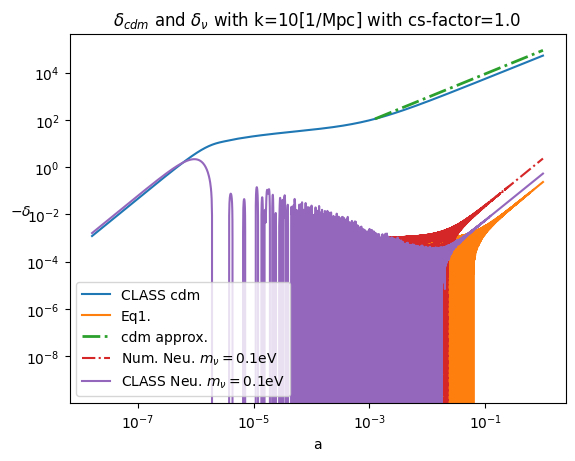

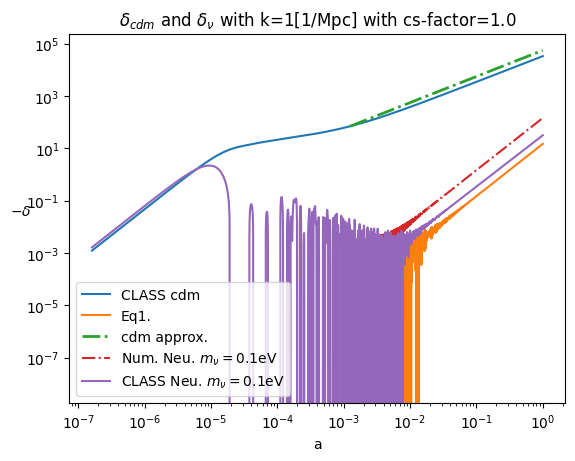

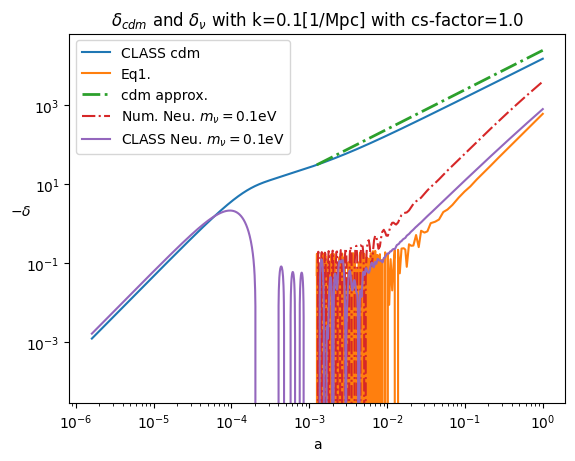

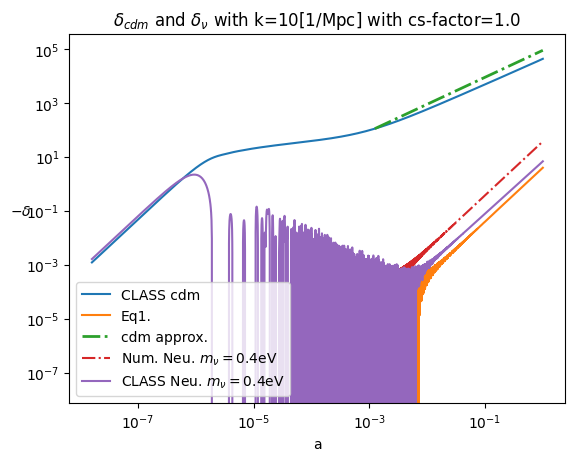

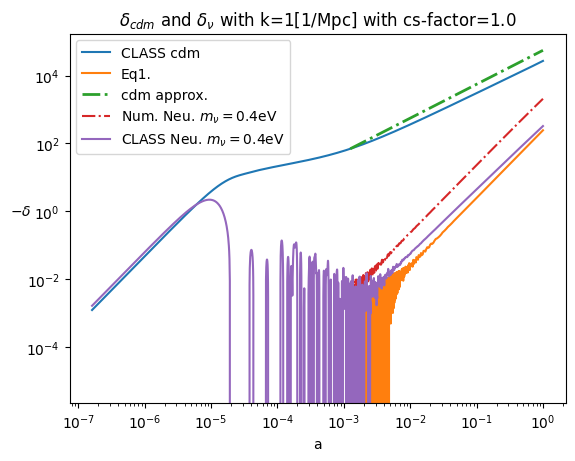

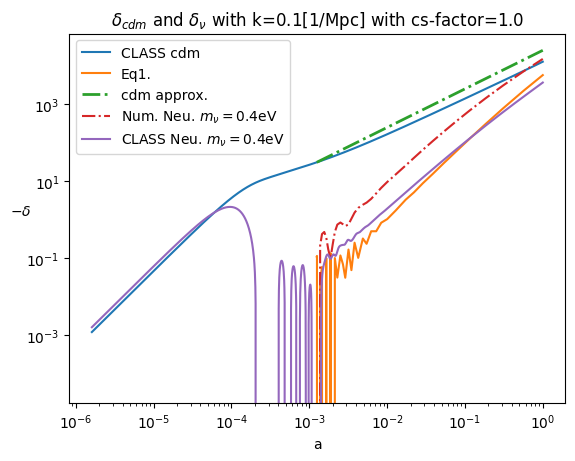

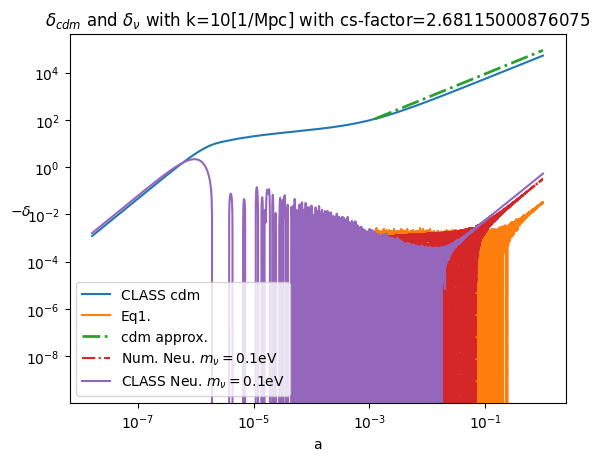

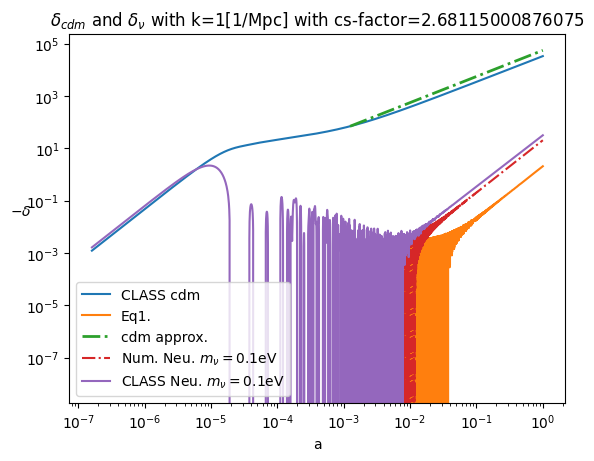

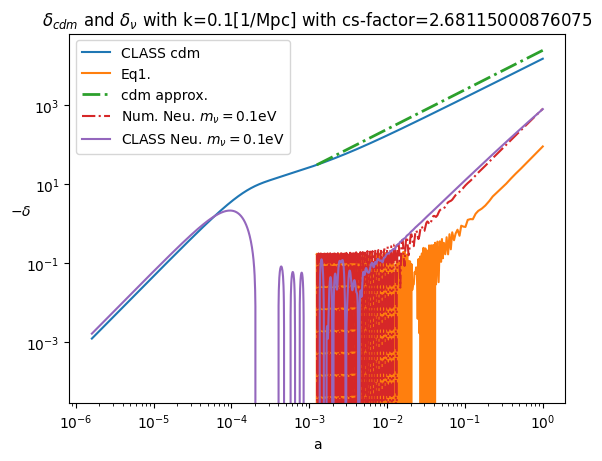

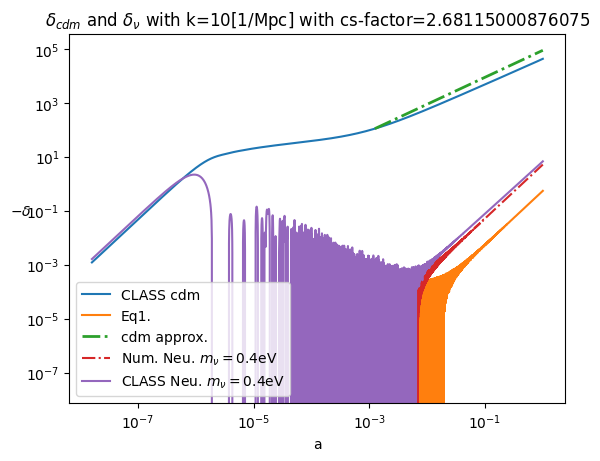

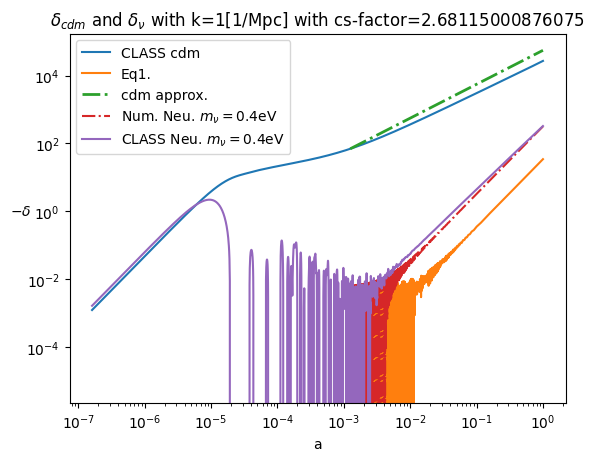

<Figure size 640x480 with 0 Axes>

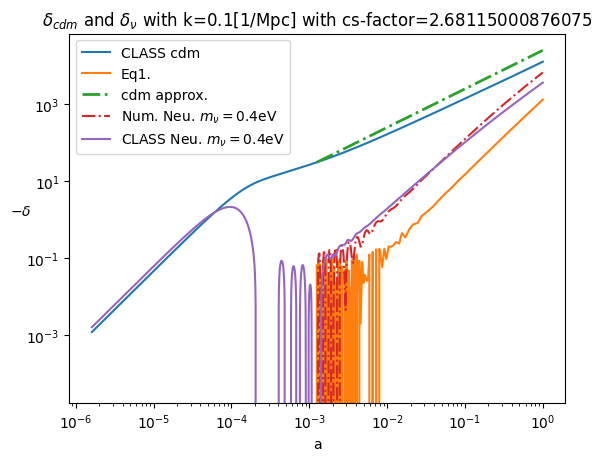

In [28]:
def f1(k_ind=0,
    factor =  np.sqrt(5/9 * 15 * special.zeta(5)/special.zeta(3)),
    kvec = [1],
    mv_test = .1,
    a_end = 1,
    z = 800,
    reduce_factor=1
     ):
    Omega_M = 0.98
    Omega_b = 0.01
    factor /= reduce_factor
    
    def Power(x,k):
        return np.power(x,k)
    def Cos(x):
        return np.cos(x)
    def Sin(x):
        return np.sin(x)
    def CosIntegral(x):
        return special.sici(x)[1]
    def SinIntegral(x):
        return special.sici(x)[0]
    def Sqrt(x):
        return np.sqrt(x)
    def Sinc(x):
        return np.sinc(x)
    
    
    typ = "$\Lambda$CDM"
    
    if Omega_M>= 0.95:
        typ = "EdS."
    
    Omega_lambda = 1 - Omega_b - Omega_M
    #kvec = [1]#0.01,0.1,1,10,1e-5]
    #k_ind = 0
    k = kvec[k_ind]
    H0=68
    H0 = 21.25
    Tv_k = 1.947
    # in MeV
    h = 0.6704
    kb = 8.617e-11 # MeV/K
    T_0 = Tv_k * kb
    
    
    cosmo_dict ={'H0':H0, 'Omega_cdm':Omega_M,'Omega_b':Omega_b, 'k_output_values':str(kvec).strip('[]')
                 ,"N_ncdm":1,"m_ncdm":mv_test # massen er givet i eV s' jeg ganger min egen test m_v skal være en faktor  1e-6 mindre
               ,'output':'tCl, lCl, dTk, vTk, pCl', 'lensing':'yes',
                "ncdm_fluid_approximation":3
                , "YHe":0.25,
                 "gauge":"sync",
                }
    c = 3*1e5 # speed of lign in km/s
    H0 /= c # i 1/Mpc
    
    
    mv = mv_test * 1e-6
    
    
    cosmo = Class()
    cosmo.set(cosmo_dict)
    cosmo.compute()
    bg = cosmo.get_background()
    pts = cosmo.get_perturbations()['scalar']
    # Here we create/import the powerspectrum values from class
    tranf = cosmo.get_transfer(z=0)
    prim = cosmo.get_primordial()
    pb = pts[k_ind]
    a = pb["a"]
    cdm = pb["delta_cdm"]
    neutrino = pb["delta_ncdm[0]"]
    plt.figure(k_ind)#np.random.randint(1,1000))
    tau = pb["tau [Mpc]"]
    a_interp = scipy.interpolate.interp1d(tau,a)
    
    a0 = 1/(z+1)
    delta_interp = scipy.interpolate.interp1d(a,pb["delta_cdm"])
    
    
    a_interp = scipy.interpolate.interp1d(a,tau)
    tau_interp = scipy.interpolate.interp1d(tau,a)
    
    
    
    delta_neutrino_class = pts[k_ind]["delta_ncdm[0]"]
    a_class = pts[k_ind]["a"]
    tau_class =  pts[k_ind]["tau [Mpc]"]
    tid = bg['proper time [Gyr]'] * c / 306.4
    theta_neutrino_class = pts[k_ind]["theta_ncdm[0]"]
    theta_neu_interp = scipy.interpolate.interp1d(a_class,theta_neutrino_class)
    delta_interp_neu = scipy.interpolate.interp1d(a_class,delta_neutrino_class)
    #delta_cdm =  scipy.interpolate.interp1d(a_class,delta_class)
    tau_interp = scipy.interpolate.interp1d(a_class,tau_class)
    
    
    delta0 = delta_interp(a0)
    
    def H(a,om=Omega_M,ol=Omega_lambda):
        return H0 * np.sqrt(om / a + ol* a**2)
    
    def cdm_func(a,y):
        delta = y[0]
        theta = y[1]   
        d_delta   = - theta / (a * H(a))
        nabla2phi = (3/2) * H0*H0 * Omega_M * delta / a
        d_theta   = ( - nabla2phi -  H(a) * theta ) / (a*H(a))
        return [d_delta,d_theta]
    h = 1.1 
    y01 = [delta_interp(a0),5e-3]  #theta_interp(a0)]
    
    
    Tv_k = 1.947
    # in MeV
    kb = 8.617e-11 # MeV/K
    T0 = Tv_k * kb
    # 
    

    def Tv(a):
        return T0 / a # in MeV

    # lydhastighed

    def cs(a):
        return factor * Tv(a) / mv

    
    
    def func(a,y):
        delta = y[0]
        d_delta = y[1]
        d2_delta = 3/2 * Omega_M * delta /(a**3 * (Omega_M/a + a**2 * Omega_lambda))-  3/2 * (Omega_M/a**2 +2 * a *Omega_lambda)/(Omega_M/a + a**2 * Omega_lambda )*d_delta  
        return [d_delta,d2_delta]
    
    
    def func1(a,y,k):
        delta = a * delta0/a0
        #d_delta = y[1]
        
        delta_nu = y[0]
        d_delta_nu = y[1]
        
        #d2_delta = 3/2 * Omega_M * delta /(a**3 * (Omega_M/a + a**2 * Omega_lambda))-  3/2 * (Omega_M/a**2 +2 * a *Omega_lambda)/(Omega_M/a + a**2 * Omega_lambda )*d_delta  
        
        d2_delta_nu = 3/2 * Omega_M * delta /(a**3 * (Omega_M/a + a**2 * Omega_lambda))-  3/2 * (Omega_M/a**2 +2 * a *Omega_lambda)/(Omega_M/a + a**2 * Omega_lambda )*d_delta_nu - k**2 * cs(a)**2 /(a**2*H(a)**2)  * delta_nu
        
        
        return [d_delta_nu,d2_delta_nu]
    
    
    h = 0.00001
    #diff = (delta_interp(a0+h)-delta_interp(a0))/h
    
    diff = (delta_interp(a0+h/2)-delta_interp(a0-h/2))/h
    
    diff_neu =  (delta_interp_neu(a0+h/2)-delta_interp_neu(a0-h/2))/h
    y0 = [delta_interp_neu(a0),diff_neu]# diff]
    
    
    
    a_span = [a0,a_end]
    sol = sc.solve_ivp(func1, t_span = a_span, y0 = y0,args=(k,))#,t_eval=np.logspace(np.log10(a0),0,100))
    t_sol = sol.t
    #delta_sol = sol.y[0]
    
    
    plt.figure(np.random.randint(1,100000))
    
    plt.loglog(a_class,-cdm,label="CLASS cdm")
    #plt.loglog(t_sol,-delta_sol,"-.",lw=2,label=r"Num. cdm  $m_{\nu}=$%seV."%mv_test)
    
    
    delta_neu_sol = sol.y[0]
    
    t0 = tid[-1]
    def neu_eq(a,c1,c2,D0):
        H0 = 2/(3*t0)
        val = 2 *k*  cs(a) * np.sqrt(a)  / H0
        si,ci = special.sici(val)
        #return dcdm * a + C1 * np.cos(val) - C2 * np.sin(val) + 9 * (cs(a)*a)**2  * k**2 * dcdm * t0**2 * (np.cos(val) * ci +np.sin(val) * si)
        
        return a * D0 + c1 * np.cos(val)- c2 * np.sin(val) + a* val**2 * D0 * (np.cos(val)*ci+np.sin(val)*si)
        
    def f(a,c1,c2):
            #a = np.log10(a)
            res  = a - 2*c1 * np.sqrt(kappa)/ np.sqrt(a)+c2
            return res # np.log10(res)
    print(H0*c,"før")
    H0 = 2/(3*t0) 
    print(H0*c,"efter")
    #diff_neu
    A = np.sqrt(delta_interp_neu(a0)**2 + (diff_neu/(-0.5 * 2*k*cs(a0)/(H0*np.sqrt(a0))))**2)
    C1 = A
    C2 = 2*np.pi*delta0/a0 *( k*cs(a0)*a0/H0 )**2
    
    def eq(a,C1,C2):
        H0 = 2/(3*t0)
        M = 2 * k*cs(a)*np.sqrt(a) /H0
        dcdm = delta0/a0
        res = a*dcdm + C1*np.cos(M) - C2*np.sin(M) + M**2*a*dcdm*(np.cos(M)*CosIntegral(M) + np.sin(M)*SinIntegral(M))
        #print(M**2*a*dcdm*(np.cos(M)*CosIntegral(M) + np.sin(M)*SinIntegral(M)))
        
        return res
    print(diff_neu)
    
    def f2(a):
        C1 = np.sqrt(delta_interp_neu(a0)**2 + (diff_neu*a0/ (cs(a0)*k))**2)
        #C2 = np.pi / 2 * ( 3 * cs(a0) * k * t0 * a0 )**2 * (delta0/a0)
        C2 = np.pi / 2 * ( 2 * cs(a0) * k * a0 /H0)**2 * (delta0/a0)
        dcdm = delta0/a0        
        #a = (t/t0)**(2/3)
        #val = 3 * cs(a) * k * t0 * np.sqrt(a)        
        
        val = 2 * cs(a) * k * np.sqrt(a) / H0
        
        return dcdm*a + C1*Cos(val) - C2*Sin(val) + val**2*a*dcdm*(Cos(val)*CosIntegral(val) + Sin(val)*SinIntegral(val))



    gamma = 0.57721

     
    plt.loglog(t_sol,-eq(t_sol,C1,C2),label="Eq1.")
    #plt.loglog(t_sol,-f2(t_sol),"-.",label="Eq2.")
    
    plt.loglog(t_sol, - t_sol * delta0/a0,"-.",lw=2,label="cdm approx.")
    plt.loglog(t_sol,-delta_neu_sol,"-.",label=r"Num. Neu. $m_{\nu}=$%seV " % (mv_test))
    plt.loglog(a_class,-delta_neutrino_class,label=r"CLASS Neu. $m_{\nu}=$%seV " % (mv_test))
    
    #plt.loglog(t_sol,-neu_eq(t_sol,C1,C2,delta0/a0))
    
    #plt.loglog(t_sol,f2(t_sol))
    
    plt.ylabel("$-\delta$",rotation=0)
    #plt.xlim([2e-8,1])
    #print(a0)
    plt.legend()
    plt.title(r"$\delta_{cdm}$ and $\delta_{\nu}$ with k=%s[1/Mpc] with cs-factor=%s"%(k,factor)) #using a cs-factor = %.2ffactor
    plt.xlabel("a")
    
    savtyp = "lambdacdm"
    if Omega_M >= 0.93:
        savtyp = "EdS"
    #plt.savefig("num-neutrino-versus-class with k=%s %s %.4f mv=%.1f approx-cdm-source.png"% (kvec[k_ind],savtyp,factor,mv_test))
    plt.savefig("anayltical-neutrinos-with-k=%s-using-cs-factor=%.2f-with-mv=%.1f.png"%(kvec[k_ind],factor,mv_test))
    
    cosmo.struct_cleanup()
    return None

f1(kvec = [10],
   a_end=1e0,
   mv_test = .1,   factor = 1)
f1(kvec = [1],
   a_end=1e0,
   mv_test = .1,   factor = 1)
f1(kvec = [.10],
   a_end=1e0,
   mv_test = .1,   factor = 1)

f1(kvec = [10],
   a_end=1e0,
   mv_test = .4,   factor = 1)
f1(kvec = [1],
   a_end=1e0,
   mv_test = .4,   factor = 1)
f1(kvec = [.10],
   a_end=1e0,
   mv_test = .4,   factor = 1)


f1(kvec = [10],
   a_end=1e0,
   mv_test = .1)
f1(kvec = [1],
   a_end=1e0,
   mv_test = .1)
f1(kvec = [.10],
   a_end=1e0,
   mv_test = .1)

f1(kvec = [10],
   a_end=1e0,
   mv_test = .4)
f1(kvec = [1],
   a_end=1e0,
   mv_test = .4)
f1(kvec = [.10],
   a_end=1e0,
   mv_test = .4)


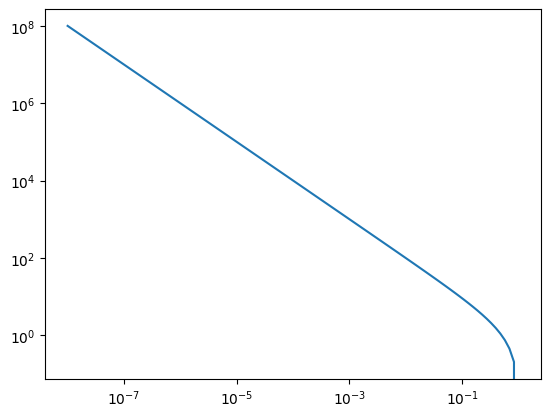

In [18]:
a = np.logspace(-8,0,100)
#a = 1/(1+z)
z = 1/a-1

plt.loglog(a,z)